In [31]:
from pykat import finesse, components                  # Importing the pykat.finesse package
import matplotlib.pyplot as plt

basekat = finesse.kat()    # Initialising Finesse
basekat.verbose = False    # Tells Finesse to talk less

basecode = """
## Parameters ##
const Pin 1M         # Laser power (1 MW)
const LX 4000        # Length of X arm (4000 m)
const LY 4000        # Length of Y arm (4000 m)

## Laser & Beam splitter ##
l laser $Pin 0 n0                         # Laser
s s1 1 n0 nbsc                            # Space from laser to beam splitter
bs BS 0.5 0.5 50 45 nbsc nbsY nbsX nbsd    # Beam splitter (R = T = 0.5, phi = 0 deg, 
                                          # AoI = 45 deg).
## X arm ##
s LX $LX nbsX nmX1         # Space, BS to mX (4000 m)
m mX 1 0 0 nmX1 nmX2       # Mirror mX (R = 1, T = 0, phi = 0 deg)

## Y arm ##
s LY $LY nbsY nmY1         # Space, BS to mY (4000 m)
m mY 1 0 0 nmY1 nmY2       # Mirror mY (R = 1, T = 0, phi = 0 deg)

## Output port ##
s sout 1 nbsd nout         # Space, BS to output

## Detectors ##
pd pout nout      # Photo diode measuring DC-power

## Simulation instructions ##
# Varying the differential arm length
xaxis mX phi lin -90 90 200      # Sweeps phi of mX from -90 to 90 in 200 linear steps 

put* mY phi $mx1                 # Takes the negative (m in $mx1 is keyword for minus) 
                                 # value from the xaxis and puts it in phi of mY.
yaxis abs                        # Returns magnitude of detector outputs
"""
# Parsing the FINESSE code
basekat.parseCommands(basecode)
# Running the simulation
out = basekat.run()


/Users/jonathandrori/miniconda2/envs/LIGO/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: parseCommands depreciated, use parse.


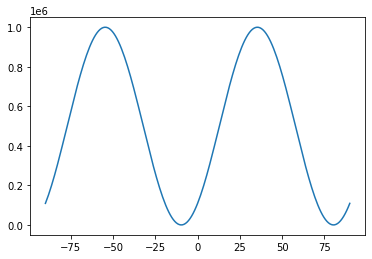

In [32]:
plt.plot(out.x, out['pout'])